In [1]:
#  Importing Libraries

In [2]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# tf.compat.v1.disable_v2_behavior()
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
tf.__version__

'1.15.0'

In [4]:
# df = pd.read_csv(r'C://Users//kaila//OneDrive//Desktop//ML In Finance//AAPL.csv')
df_ar = pd.read_csv('Kailash_3_AutoReg_prediction.csv')
df_ema = pd.read_csv('Kailash_2_EMA_prediction.csv')
df_macd = pd.read_csv('Kailash_1_MACD_prediction.csv')
df_poly = pd.read_csv('Amey_Poly_PCA.csv') 
df_LR = pd.read_csv('Rean_LR.csv') 

In [5]:
df_ar.Date = pd.to_datetime(df_ar.Date)
df_ema.Date = pd.to_datetime(df_ema.Date)
df_macd.Date = pd.to_datetime(df_macd.Date)
df_poly.Date = pd.to_datetime(df_poly.Date)
df_LR.Date = pd.to_datetime(df_LR.Date)

### Create weighted average of RMSE:

In [29]:
def weighted_avg (RMSEs):
#     print(RMSEs)
    sums = 0
    divide = 1
    #  Sum of all RMSE
    for i in range(1,len(RMSEs)+1):
        name = 'M{}'.format(str(i))
        sums  = sums + RMSEs[name] #sum1
        print(sums)
    sums2 = 0
    
    for i in range(1, len(RMSEs)+1):
        #  Devide total sum by individual RMSE Value
        name = 'M{}'.format(str(i))
        RMSEs[name] = sums/RMSEs[name] #n1
        #  Add all processed RMSE 
        sums2 = sums2 + RMSEs[name]
        
    #  Again We devide RMSE by total sum to get the ratio 
    for i in range(1, len(RMSEs)+1):
        name = 'M{}'.format(str(i))
        RMSEs[name] = RMSEs[name]/sums2
    
    print(RMSEs)

In [30]:
# {'df_ar':1.29, 'df_ema':4.24, 'df_macd':4.31, 'df_poly':19.6, 'df_LR':20.8}
dict_algo = {'M1':1.29, 'M2':4.24, 'M3':4.31, 'M4':19.6, 'M5':20.8}
weighted_avg(dict_algo)

1.29
5.53
9.84
29.44
50.24
{'M1': 0.5775723622356099, 'M2': 0.17572366681224924, 'M3': 0.17286968614476494, 'M4': 0.03801369118795596, 'M5': 0.03582059361942004}


In [8]:
df_ar['Predict_AutoReg'] = 0.5775723622356099 * df_ar['Predict_AutoReg']
df_ema['Predict_EMA'] = 0.17572366681224924 * df_ema['Predict_EMA']
df_macd['Predict_MACD'] = 0.17286968614476494 * df_macd['Predict_MACD']
df_poly['Predictions'] = 0.03801369118795596 * df_poly['Predictions']
df_LR['Preds'] = 0.03582059361942004 * df_LR['Preds']

In [9]:
y_ped = pd.DataFrame()
y_ped['close'] = df_ar['Predict_AutoReg'] + df_ema['Predict_EMA'] + df_macd['Predict_MACD'] + df_poly['Predictions'] + df_LR['Preds']

In [10]:
y_ped['close']

0      221.567779
1      222.453322
2      220.766905
3      218.687002
4      218.439845
          ...    
195    196.625754
196    196.662818
197    197.532712
198           NaN
199           NaN
Name: close, Length: 200, dtype: float64

In [11]:
data = y_ped['close'].dropna()
data_to_use = data.values
data_to_use

array([221.56777895, 222.45332188, 220.76690457, 218.68700153,
       218.43984516, 218.22708552, 218.23873467, 217.63121875,
       219.26370082, 219.62551547, 220.49786451, 222.13700564,
       223.3806376 , 224.65713532, 226.41742561, 226.92861926,
       225.09811982, 223.85408435, 223.72808125, 220.77319097,
       217.78817093, 217.43230448, 217.96965655, 218.07076078,
       219.00385091, 217.64573405, 216.74495597, 217.81521652,
       218.56262015, 217.1184293 , 216.27324009, 215.96882918,
       213.77297678, 212.69434046, 213.62764237, 215.91180121,
       212.75581798, 207.87770608, 205.5978736 , 206.21506787,
       207.32922498, 205.78321428, 201.75945739, 197.09463596,
       193.88484703, 192.05510482, 191.89551798, 190.31373148,
       185.84796468, 181.70638621, 179.26158472, 177.29546761,
       176.79274295, 177.8002371 , 179.36053854, 179.33488426,
       180.37588833, 180.9682286 , 177.50837675, 175.61091783,
       173.10660237, 172.10678472, 171.37549859, 171.12

#### The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.


In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_use.reshape(-1, 1))
scaled_data
# z = (x - u) / s
# scaled_data = (((data_to_use)-data_to_use.mean()) / data_to_use.std().reshape(-1,1)).reshape(-1, 1)
# scaled_data

array([[ 1.59648131e+00],
       [ 1.63937666e+00],
       [ 1.55768727e+00],
       [ 1.45693760e+00],
       [ 1.44496544e+00],
       [ 1.43465945e+00],
       [ 1.43522373e+00],
       [ 1.40579590e+00],
       [ 1.48487268e+00],
       [ 1.50239884e+00],
       [ 1.54465508e+00],
       [ 1.62405442e+00],
       [ 1.68429546e+00],
       [ 1.74612850e+00],
       [ 1.83139627e+00],
       [ 1.85615828e+00],
       [ 1.76748962e+00],
       [ 1.70722903e+00],
       [ 1.70112549e+00],
       [ 1.55799178e+00],
       [ 1.41339860e+00],
       [ 1.39616057e+00],
       [ 1.42218969e+00],
       [ 1.42708714e+00],
       [ 1.47228565e+00],
       [ 1.40649901e+00],
       [ 1.36286568e+00],
       [ 1.41470868e+00],
       [ 1.45091261e+00],
       [ 1.38095658e+00],
       [ 1.34001595e+00],
       [ 1.32527041e+00],
       [ 1.21890419e+00],
       [ 1.16665548e+00],
       [ 1.21186425e+00],
       [ 1.32250800e+00],
       [ 1.16963342e+00],
       [ 9.33339624e-01],
       [ 8.2

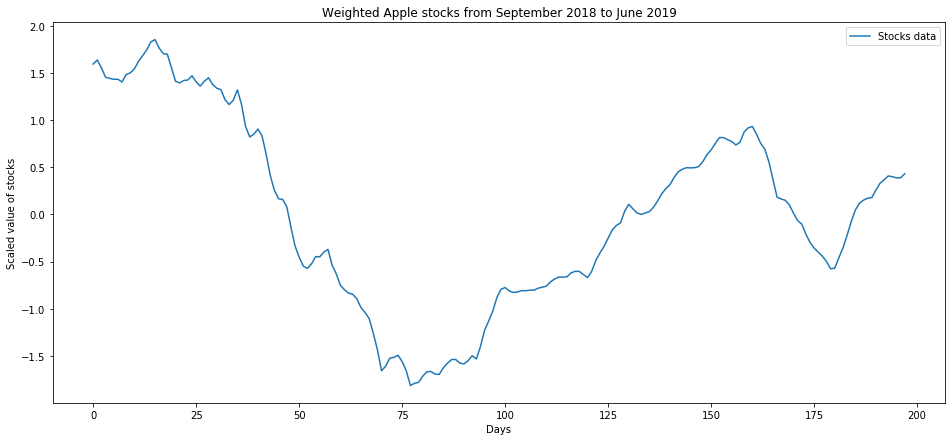

In [28]:
plt.figure(figsize=(16,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Weighted Apple stocks from September 2018 to June 2019')
plt.xlabel('Days')
plt.ylabel('Scaled value of stocks')
plt.plot(scaled_data, label='Stocks data')
plt.legend()
plt.show()

In [84]:
def lstm_tf(scaledData):
    
#     Taking 5 X 5 size window each time
    def window_data(data, window_size):
        
        X = []
        y = []
        
        i = 0
        while (i + window_size) <= len(data) - 1:
            X.append(data[i:i+window_size])
            y.append(data[i+window_size])
            
            i += 1
        assert len(X) ==  len(y)
        return X, y
    
    X, y = window_data(scaled_data, 5)
#     print("X, y :", X, y)
    X_train  = np.array(X[:150])
    y_train = np.array(y[:150])
    
    X_test = np.array(X[150:])
    y_test = np.array(y[150:])
    print(" ----------------------- Splitting Data Into Train Test ----------------------- ")
    print("LSTM Model Information:")
    print("X_train size: {}".format(X_train.shape))
    print("y_train size: {}".format(y_train.shape))
    print("X_test size: {}".format(X_test.shape))
    print("y_test size: {}".format(y_test.shape))
    print("-------------------------------------------------------------------------------- ")

    #Hyperparameters used in the LSTM network
    #how many windows of data we are passing at once
    batch_size = 5
    #how big window_size is (Or How many days do we consider to predict next point in the sequence)
    window_size = 5     
    #How many units do we use in LSTM cell
    hidden_layer = 256 
    #To prevent exploding gradient, we use clipper to clip gradients below -margin or above this margin
    clip_margin = 4 
    learning_rate = 0.001 
    epochs = 150
    
    
    inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1])
    targets = tf.placeholder(tf.float32, [batch_size, 1])
    
    # LSTM weights
    # Weights for the input gate
        # Outputs random values from a truncated normal distribution    
    weights_input_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
    weights_input_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
    bias_input = tf.Variable(tf.zeros([hidden_layer]))
    
    # weights for the forgot gate
    weights_forget_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
    weights_forget_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
    bias_forget = tf.Variable(tf.zeros([hidden_layer]))
    
    # weights for the output gate
    weights_output_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
    weights_output_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
    bias_output = tf.Variable(tf.zeros([hidden_layer]))
    
    # weights for the memory cell
    weights_memory_cell = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
    weights_memory_cell_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
    bias_memory_cell = tf.Variable(tf.zeros([hidden_layer]))
    
    ## Output layer weigts
    weights_output = tf.Variable(tf.truncated_normal([hidden_layer, 1], stddev=0.05))
    bias_output_layer = tf.Variable(tf.zeros([1]))
    
    
    def LSTM_cell(input, output, state):
        
        input_gate = tf.sigmoid(tf.matmul(input, weights_input_gate) + tf.matmul(output, weights_input_hidden) + bias_input)
        
        forget_gate = tf.sigmoid(tf.matmul(input, weights_forget_gate) + tf.matmul(output, weights_forget_hidden) + bias_forget)
        
        output_gate = tf.sigmoid(tf.matmul(input, weights_output_gate) + tf.matmul(output, weights_output_hidden) + bias_output)
        
        memory_cell = tf.tanh(tf.matmul(input, weights_memory_cell) + tf.matmul(output, weights_memory_cell_hidden) + bias_memory_cell)
        
        state = state * forget_gate + input_gate * memory_cell
        
        output = output_gate * tf.tanh(state)
        return state, output
    
    
    outputs = []
    for i in range(batch_size): #Iterates through every window in the batch
        #for each batch I am creating batch_state as all zeros and output for that window which is all zeros at the beginning as well.
        batch_state = np.zeros([1, hidden_layer], dtype=np.float32) 
        batch_output = np.zeros([1, hidden_layer], dtype=np.float32)
        #for each point in the window we are feeding that into LSTM to get next output
        for ii in range(window_size):
            batch_state, batch_output = LSTM_cell(tf.reshape(inputs[i][ii], (-1, 1)), batch_state, batch_output)
        #last output is conisdered and used to get a prediction
        outputs.append(tf.matmul(batch_output, weights_output) + bias_output_layer)
        
        
    outputs
    
    losses = []
    
    for i in range(len(outputs)):
        losses.append(tf.losses.mean_squared_error(tf.reshape(targets[i], (-1, 1)), outputs[i]))
        
    loss = tf.reduce_mean(losses)
    
    gradients = tf.gradients(loss, tf.trainable_variables())
    clipped, _ = tf.clip_by_global_norm(gradients, clip_margin)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    trained_optimizer = optimizer.apply_gradients(zip(gradients, tf.trainable_variables()))
    
    session = tf.Session()
    session.run(tf.global_variables_initializer())
    
    for i in range(epochs):
        traind_scores = []
        ii = 0
        epoch_loss = []
        while(ii + batch_size) <= len(X_train):
            X_batch = X_train[ii:ii+batch_size]
            y_batch = y_train[ii:ii+batch_size]
            
            o, c, _ = session.run([outputs, loss, trained_optimizer], feed_dict={inputs:X_batch, targets:y_batch})
            
            epoch_loss.append(c)
            traind_scores.append(o)
            ii += batch_size
        if (i % 10) == 0:
            print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))
    
    
    
    sup =[]
    for i in range(len(traind_scores)):
        for j in range(len(traind_scores[i])):
            sup.append(traind_scores[i][j][0])
            
    print("len(X_test): ",len(X_test))      
    tests = []
    i = 0
    while i+batch_size <= len(X_test):
        
        o = session.run([outputs], feed_dict={inputs:X_test[i:i+batch_size]})
        i += batch_size
        tests.append(o)
        
    print('length of text: ',len(tests))
    tests_new = []
    for i in range(len(tests)):
        for j in range(len(tests[i][0])):
            tests_new.append(tests[i][0][j])
            
    test_results = []
    for i in range(77):
#         print("i: ",i)
        if i >= 40:
            test_results.append(tests_new[i-40])
        else:
            test_results.append(None)
    
    plt.figure(figsize=(16, 7))
    plt.plot(scaled_data, label='Original data')
    plt.plot(sup, label='Training data')
    plt.plot(range(113,190),test_results, label='Testing data')
    plt.legend()
    plt.show()
    
    inv_ytrain = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    inv_test = scaler.inverse_transform(np.array(tests_new).reshape(-1, 1))
#     print("size inv_test: ", inv_test.shape)
#     print("size inv_ytrain: ", inv_ytrain[0:40].shape)
    
    residuals = inv_test - inv_ytrain[0:40]
    rmse = np.sqrt(np.mean(residuals ** 2))
    R2 =1-((residuals.transpose()@residuals)/(np.var(inv_ytrain)*len(sup)))
    print('RMSE is: ', rmse)   
    session.close()
    
    #indata = scaler.inverse_transform(test_results)
    
    return R2, inv_test, inv_ytrain

 ----------------------- Splitting Data Into Train Test ----------------------- 
LSTM Model Information:
X_train size: (150, 5, 1)
y_train size: (150, 1)
X_test size: (43, 5, 1)
y_test size: (43, 1)
-------------------------------------------------------------------------------- 
Epoch 0/150  Current loss: 0.6088876128196716
Epoch 10/150  Current loss: 0.11419517546892166
Epoch 20/150  Current loss: 0.097140833735466
Epoch 30/150  Current loss: 0.08501230925321579
Epoch 40/150  Current loss: 0.036976464092731476
Epoch 50/150  Current loss: 0.0527525432407856
Epoch 60/150  Current loss: 0.023914633318781853
Epoch 70/150  Current loss: 0.026580022647976875
Epoch 80/150  Current loss: 0.02886265143752098
Epoch 90/150  Current loss: 0.02787904255092144
Epoch 100/150  Current loss: 0.016545796766877174
Epoch 110/150  Current loss: 0.02199964039027691
Epoch 120/150  Current loss: 0.021001460030674934
Epoch 130/150  Current loss: 0.008967778645455837
Epoch 140/150  Current loss: 0.00724787963

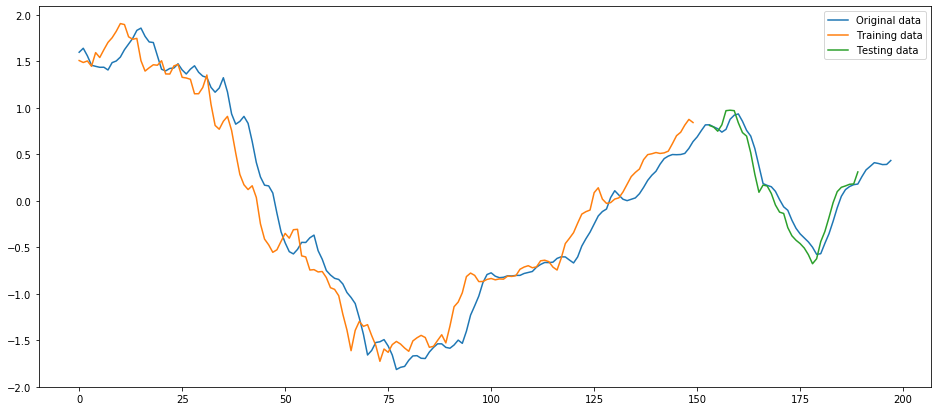

RMSE is:  1.407846799197422


In [85]:
Rsq, pred_values, test_values = lstm_tf(scaled_data)

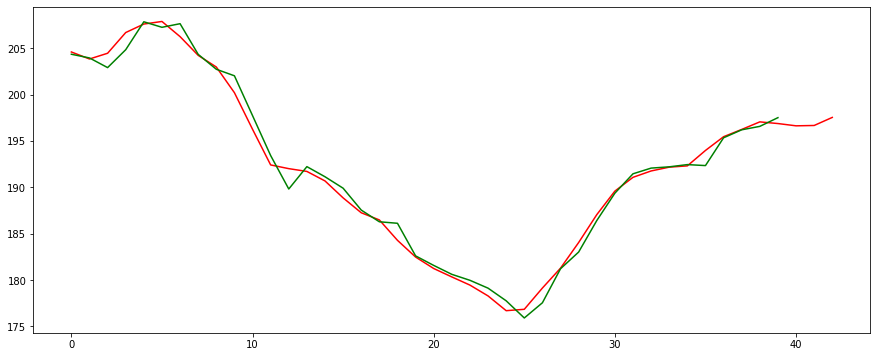

In [69]:
# Zooming in on the prediction and actual
fig , ax = plt.subplots(figsize =(15,6))
ax.plot(test_values, color='red', label='True Closing Price')
plt.plot(pred_values, color='green', label='Predicted Closing Price' )

### Calculating Residuals

In [74]:
residual_errors = (test_values[:40] - pred_values)

#### Plotting error bar plots



C:\Users\kaila\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<ErrorbarContainer object of 3 artists>

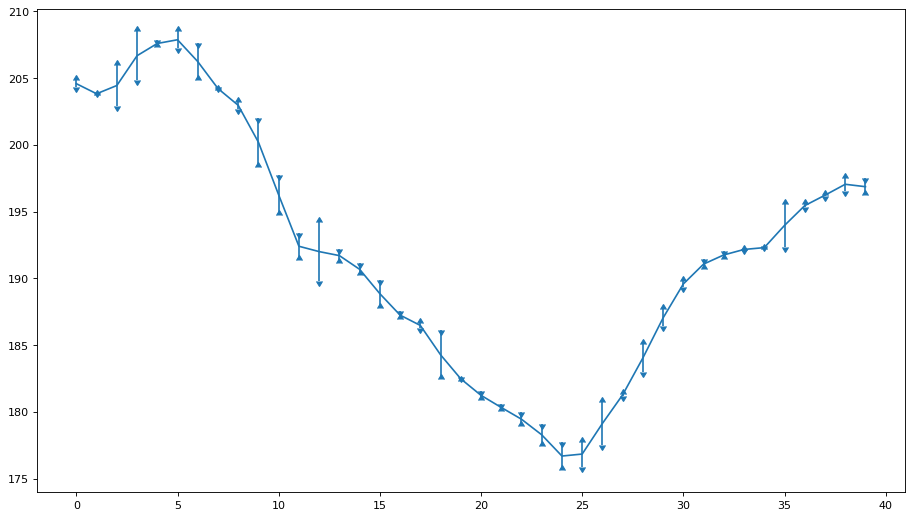

In [75]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='red')
plt.errorbar(np.arange(len(test_values[:40])),test_values[:40],yerr=residual_errors,uplims=True, lolims=True)

### Plotting QQ plot to see if the errors are normally distributed. 

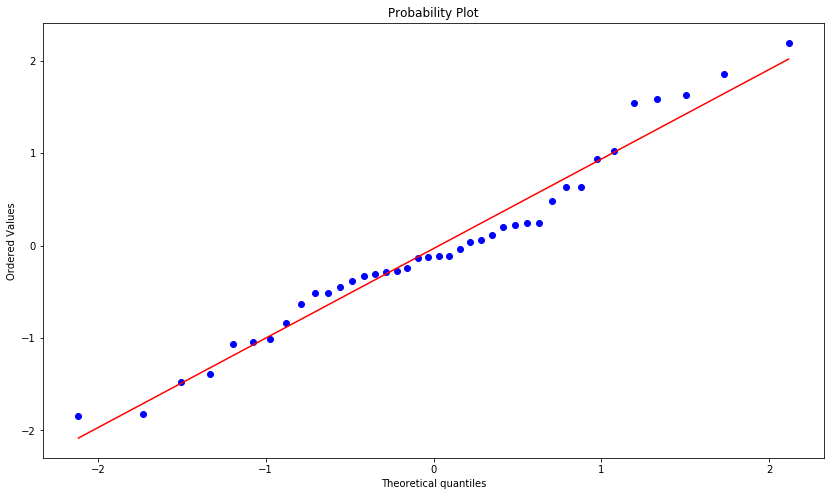

In [76]:
from scipy import stats
plt.figure(figsize=(14, 8))
res = stats.probplot(residual_errors.flatten(), plot=plt)
plt.show()

- From the QQ plot we can see that the errors have a curve and does nothave a linear fit. 

In [44]:
from sklearn.ensemble.forest import RandomForestRegressor

In [45]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds, show_stdv=False, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
            
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['median_apt_value'],eval_metric='rmse')
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    print("Cross validation results: ")
    print("Train RMSE Min: ",round(cvresult['train-rmse-mean'].min(),4), "      Train RMSE Max: ",round(cvresult['train-rmse-mean'].max(),4))
    print("Test RMSE Min: ",round(cvresult['test-rmse-mean'].min(),4), "      Test RMSE Max: ",round(cvresult['test-rmse-mean'].max(),4))
    
    print ("R2 Score of model : %.4g" % metrics.r2_score(df_pricing['median_apt_value'].values, dtrain_predictions))
    

In [ ]:
target="median_apt_value"
predictors = [x for x in df_pricing.columns if x not in [target]]

for mx_dpt in range(2,12,2):
    print('\n------------------- Prediction at max_depth= ',mx_dpt,'-------------------')
    xgb2 = xgboost.XGBRegressor(
        max_depth=mx_dpt,
        learning_rate =0.07,
        n_estimators=500,
        objective= 'reg:squarederror',
        min_child_weight=1.2,
        gamma=0.05,
        subsample=0.7,
        colsample_bytree=0.5,
        # nthread=11,
        n_jobs=11,
        # scale_pos_weight=1,
        # reg_alpha=0.1,
         seed=45)
    modelfit(xgb2, df_pricing, predictors)
    

In [ ]:
# build our RF model
RF_Model = RandomForestRegressor(n_estimators=100, max_features=1, oob_score=True)
 
# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train[:, None]
 
# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)
 
# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test[:, None])).rename(
    columns={0:'predicted_price'}).set_index('predicted_price')
X_train_predict=pd.DataFrame(
    rgr.predict(X_train[:, None])).rename(
    columns={0:'predicted_price'}).set_index('predicted_price')
 
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

## Generating Additional data for Multivariat

In [39]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('close%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('close%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('close%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [40]:
values = scaled_data
data = series_to_supervised(values, 3)
print(data.tail(20))

     close1(t-3)  close1(t-2)  close1(t-1)  close1(t)
858     0.653056     0.677579     0.591482   0.544302
859     0.677579     0.591482     0.544302   0.713297
860     0.591482     0.544302     0.713297   0.790597
861     0.544302     0.713297     0.790597   0.862034
862     0.713297     0.790597     0.862034   0.993445
863     0.790597     0.862034     0.993445   1.058218
864     0.862034     0.993445     1.058218   1.117659
865     0.993445     1.058218     1.117659   1.101133
866     1.058218     1.117659     1.101133   1.100066
867     1.117659     1.101133     1.100066   1.062483
868     1.101133     1.100066     1.062483   1.093136
869     1.100066     1.062483     1.093136   1.214684
870     1.062483     1.093136     1.214684   1.199224
871     1.093136     1.214684     1.199224   1.241607
872     1.214684     1.199224     1.241607   1.223481
873     1.199224     1.241607     1.223481   1.218150
874     1.241607     1.223481     1.218150   1.137917
875     1.223481     1.21815

# Trading Strategy

## Bollinger_band
- A Bollinger Band is a technical analysis tool defined by a set of lines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA)

- Bollinger Bands are a technical analysis tool developed by John Bollinger.
- There are three lines that compose Bollinger Bands: A simple moving average (middle band) and an upper and lower band.
- The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average, but can be modified.


In [18]:
#read csv file, use date as index and read close as a column
df = pd.read_csv('AAPL.csv'.format('AAPL'), index_col='Date', parse_dates=True, usecols=['Date','Close'])
print(df)

                 Close
Date                  
2016-01-04  105.349998
2016-01-05  102.709999
2016-01-06  100.699997
2016-01-07   96.449997
2016-01-08   96.959999
...                ...
2019-06-24  198.580002
2019-06-25  195.570007
2019-06-26  199.800003
2019-06-27  199.740005
2019-06-28  197.919998

[878 rows x 1 columns]


In [19]:
df = df.rename(columns={'Close': 'AAPL STOCK'})

# calculate Simple Moving Average with 20 days window
sma = df.rolling(20, win_type='triang').mean()

# calculate the standard deviation
rstd = df.rolling(20).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={'AAPL STOCK': 'upper'})
df['Upper Band'] = upper_band.upper
# print(upper_band)

lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={'AAPL STOCK': 'lower'})
df['Lower Band'] = lower_band.lower
# print(lower_band)



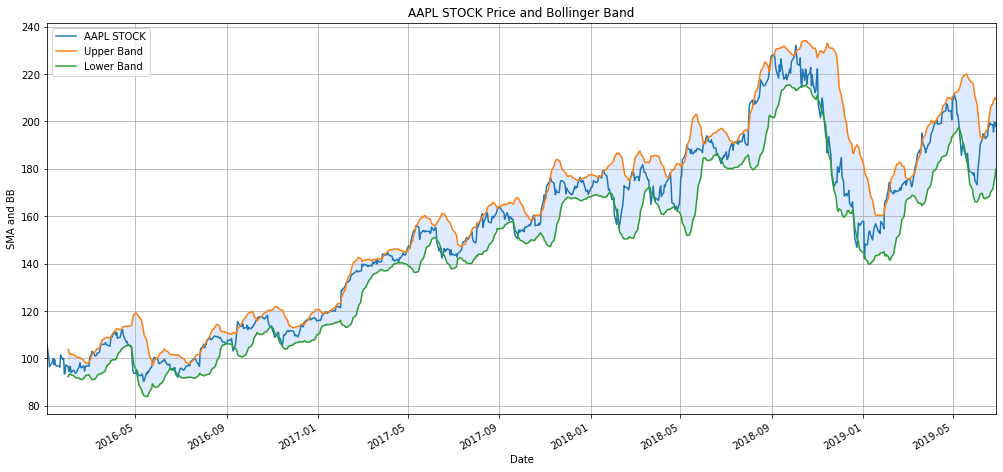

In [20]:
ax = df.plot(title='{} Price and Bollinger Band'.format('AAPL STOCK'), figsize=(17,8))
ax.fill_between(df.index, df['Lower Band'], df['Upper Band'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()

- In the chart depicted above, Bollinger Bands bracket the 20-day SMA of the stock with an upper and lower band along with the daily movements of the stock's price. Because standard deviation is a measure of volatility, when the markets become more volatile the bands widen; during less volatile periods, the bands contract.

## Take weighted Average of RMSE Values:

In statistics, inverse-variance weighting is a method of aggregating two or more random variables to minimize the variance of the weighted average. Each random variable is weighted in inverse proportion to its variance.

Given a sequence of independent observations yi with variances σi2, the inverse-variance weighted average is given by[1]
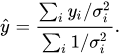

The inverse-variance weighted average has the least variance among all weighted averages, which can be calculated as

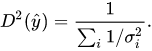

In [75]:
rmse_vals = np.array([1.1,6.7,6.8,7.2,11.1,3.4])
mu = rmse_vals.mean()
print('mu: ',mu)
sigma2 = rmse_vals.var()
print('sigma square: ',sigma2)

mu:  6.05
sigma square:  9.889166666666666


In [76]:
normalised_value = (rmse_vals-mu)/sigma2
normalised_value

array([-0.50054774,  0.06572849,  0.07584057,  0.11628887,  0.51065981,
       -0.26797   ])

In [98]:
print(sum(rmse_vals))

36.3


In [ ]:
wt_vals2 = []
new_vals = 0.0
for i,val in enumerate(wt_vals):
#     print(val)
    new_vals = 0.0
    new_vals = 1 / (1/sigma2)
    wt_vals2.append(new_vals)
    
print("wsvsv",wt_vals2)

In [101]:
wt_vals = (sum(rmse_vals)/sigma2) / (1/sigma2)
wt_vals

36.3

In [97]:
rmse_vals = [1.1,6.7,6.8,7.2,11.1,3.4]
wt_vals = []
for i,val in enumerate(rmse_vals):
#     print(val)
    new_vals = 0.0
    new_vals = (val/sigma2) / (1/sigma2)
    wt_vals.append(new_vals)
    
print("wsvsv",wt_vals)

wsvsv [1.1, 6.699999999999999, 6.8, 7.2, 11.1, 3.4]


### Calculate percentage of RMSE of individual model:

In [14]:
rmse_vals = np.array([1.1,6.7,6.8,7.2,11.1,3.4])

In [114]:
wt_perc = []
total_rmse = sum(rmse_vals)

for i,val in enumerate(sorted(rmse_vals)):
    per_val = 0.0
    per_val = total_rmse / 
    wt_perc.append(round(per_val,4))
    
print("Percentage of RMSE: ",wt_perc)

Percentage of RMSE:  [0.0303, 0.0937, 0.1846, 0.1873, 0.1983, 0.3058]


#### Checking if total value is adding upto 1

In [115]:
sum(wt_perc)

1.0

#### Assigning highest value to model with low RMSE:

In [116]:
# revesing the array will simply give the highes value to 1st
wt_inv_perc = wt_perc[::-1]
print("Reversed weighted average: ",wt_inv_perc)

Reversed weighted average:  [0.3058, 0.1983, 0.1873, 0.1846, 0.0937, 0.0303]


In [117]:
sum(wt_inv_perc)

1.0